<a href="https://colab.research.google.com/github/okweipeng/Employment_Outcomes_Based_on_Education_Level_Analysis/blob/main/Data_Exploration_on_Education_Major_Outcome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Research Question: How does college degree attainment influence employment rates and job prospects, and what are the differences in employment outcomes between college graduates and non-graduates?

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

# Data Origins

**Files used via Github:** (Section ~ college-majors)

Source: https://github.com/fivethirtyeight/data/tree/master/college-majors

*Credit: Bencasselman*

**Files used via Kaggle:**

Source: https://www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022

In [2]:
all_agesDF = pd.read_csv('all-ages.csv')
grad_studentsDF = pd.read_csv('grad-students.csv')
major_listDF = pd.read_csv('majors-list.csv')
recent_gradsDF = pd.read_csv('recent-grads.csv')
women_stemDF = pd.read_csv('women-stem.csv')
wages_by_eduDF = pd.read_csv('wages_by_education.csv')

# Preprocessing datasets

In [4]:
"""
Created an helper functoon to inspect each dataset to be preprocessed
"""

def inspect_df(df, name):
    print(f"\n=== {name} ===")
    print("Shape:", df.shape)
    print("Column names:", df.columns.tolist())
    print("\nMissing values:\n", df.isnull().sum())
    print("\nDuplicates:", df.duplicated().sum())
    print("\nData types:\n", df.dtypes)
    print("\nPreview:\n", df.head())

In [25]:
"""
Inspecting multiple DataFrames to review their structure,
missing values, and general info for initial data exploration.
"""

inspect_df(all_agesDF, "All Ages")
inspect_df(grad_studentsDF, "Grad Students")
inspect_df(major_listDF, "Majors List")
inspect_df(recent_gradsDF, "Recent Grads")
inspect_df(women_stemDF, "Women in STEM")
inspect_df(wages_by_eduDF, "Wages by Education")


=== All Ages ===
Shape: (173, 11)
Column names: ['Major_code', 'Major', 'Major_category', 'Total', 'Employed', 'Employed_full_time_year_round', 'Unemployed', 'Unemployment_rate', 'Median', 'P25th', 'P75th']

Missing values:
 Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

Duplicates: 0

Data types:
 Major_code                         int64
Major                             object
Major_category                    object
Total                              int64
Employed                           int64
Employed_full_time_year_round      int64
Unemployed                         int64
Unemployment_rate                float64
Median             

### Missing (one) value in Major_Cateogry

In [10]:
"""
Replaced the missing value as unknown
"""

major_listDF['Major_Category'] = major_listDF['Major_Category'].fillna('Unknown')

### 1 row has missing values (Total, Men, Woman, ShareWoman)

In [9]:
"""
Filled missing values with 0
"""

recent_gradsDF.fillna(0, inplace=True)

### Plotting line plot using wages_by_eduDF

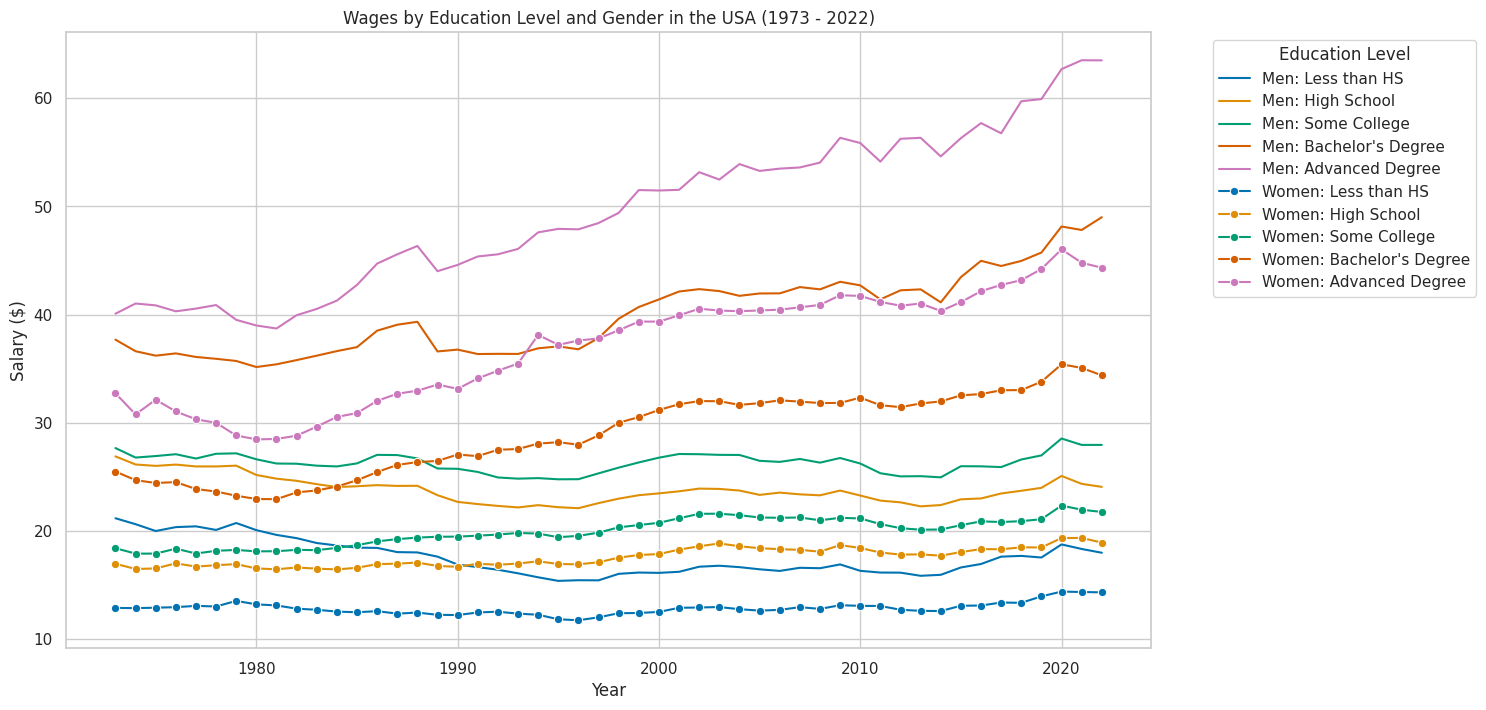

In [24]:
"""
Visualizing wage trends over time by education level and gender in the USA (1973-2022),
using distinct line styles and colors for men and women across different education categories.
"""

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
palette = sns.color_palette("colorblind")  # Colorblind-friendly palette

# Men data with solid lines
sns.lineplot(x="year", y="men_less_than_hs", data=wages_by_eduDF, label="Men: Less than HS", color=palette[0], linestyle='-')
sns.lineplot(x="year", y="men_high_school", data=wages_by_eduDF, label="Men: High School", color=palette[1], linestyle='-')
sns.lineplot(x="year", y="men_some_college", data=wages_by_eduDF, label="Men: Some College", color=palette[2], linestyle='-')
sns.lineplot(x="year", y="men_bachelors_degree", data=wages_by_eduDF, label="Men: Bachelor's Degree", color=palette[3], linestyle='-')
sns.lineplot(x="year", y="men_advanced_degree", data=wages_by_eduDF, label="Men: Advanced Degree", color=palette[4], linestyle='-')

# Women data with markers and dashed lines to distinguish
sns.lineplot(x="year", y="women_less_than_hs", data=wages_by_eduDF, marker='o', label="Women: Less than HS", color=palette[0], linestyle='-')
sns.lineplot(x="year", y="women_high_school", data=wages_by_eduDF, marker='o', label="Women: High School", color=palette[1], linestyle='-')
sns.lineplot(x="year", y="women_some_college", data=wages_by_eduDF, marker='o', label="Women: Some College", color=palette[2], linestyle='-')
sns.lineplot(x="year", y="women_bachelors_degree", data=wages_by_eduDF, marker='o', label="Women: Bachelor's Degree", color=palette[3], linestyle='-')
sns.lineplot(x="year", y="women_advanced_degree", data=wages_by_eduDF, marker='o', label="Women: Advanced Degree", color=palette[4], linestyle='-')

plt.title('Wages by Education Level and Gender in the USA (1973 - 2022)')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Visualization:

To effectively visualize this data:
- Use different line styles (solid and dashed) to differentiate between genders of education level.
- Use a color friendly palette to ensure accessibility.
- Provide clear legends and labels to help viewers understand the data.

The dataset allows us to observe trends in educational attainment over time. For example, we can see whether the percentage of individuals attaining higher education levels has increased or decreased over the years.

# **Recent Gradutes Employment Type Based off of Major Cateogry (Part vs Full Time)**

In [13]:
"""
Merging 2 csv datasets (recent_grads & grad_students) on college major to limit the fields, to match major to its category
"""

combined_data = pd.merge(recent_gradsDF, grad_studentsDF, on='Major_category', how='left')

Both CSV files are to be merged on college major to its corresponding categories, in effort to limit the graduate studies fields to gain a better fit. The visual that will be created will be a heatmap with the imports of seaborn in demonstrating the types of employment status for recent graduates for the year of 2022. Employment status will contain part time and full time working status among recent grads of the year 2022.


# **Specifying The Neccessary Column Fields Towards Visualization:**

In [14]:
"""
Aggregating/Choosing the neccessary column fields to create the visualization on recent graduates employment type based off of there major
"""

# Summing the total of specified column fields for later calcuation
aggregated_data = combined_data.groupby('Major_category').agg({
    'Part_time': 'sum',
    'Full_time': 'sum',
}).reset_index()

# **Calculations on Heatmap; Full Time vs Part Time Employment Status Under Major Category:**

In [23]:
"""
Calculating total graduate employment by summing part-time and full-time graduates,
then computing the percentage share of part-time and full-time employment
among recent graduates for each major category.
"""

# Calculate total graduates employed (part-time + full-time)
aggregated_data['Total_grad_employed'] = aggregated_data['Part_time'] + aggregated_data['Full_time']

# Calculate percentage of part-time employment among graduates
aggregated_data['Grad_Part_time_Percentage'] = (aggregated_data['Part_time'] / aggregated_data['Total_grad_employed']) * 100

# Calculate percentage of full-time employment among graduates
aggregated_data['Grad_Full_time_Percentage'] = (aggregated_data['Full_time'] / aggregated_data['Total_grad_employed']) * 100

The calculations that are shown, are to calculate the employment rate status for the recent graduates, the status in ~ part time & full time in percentage form. After the calculations, in the effort of the creation of the visual, we will match the major categories to recent graduates' employment either in full-time or part-time employment status.



# **Visual Implementations:**

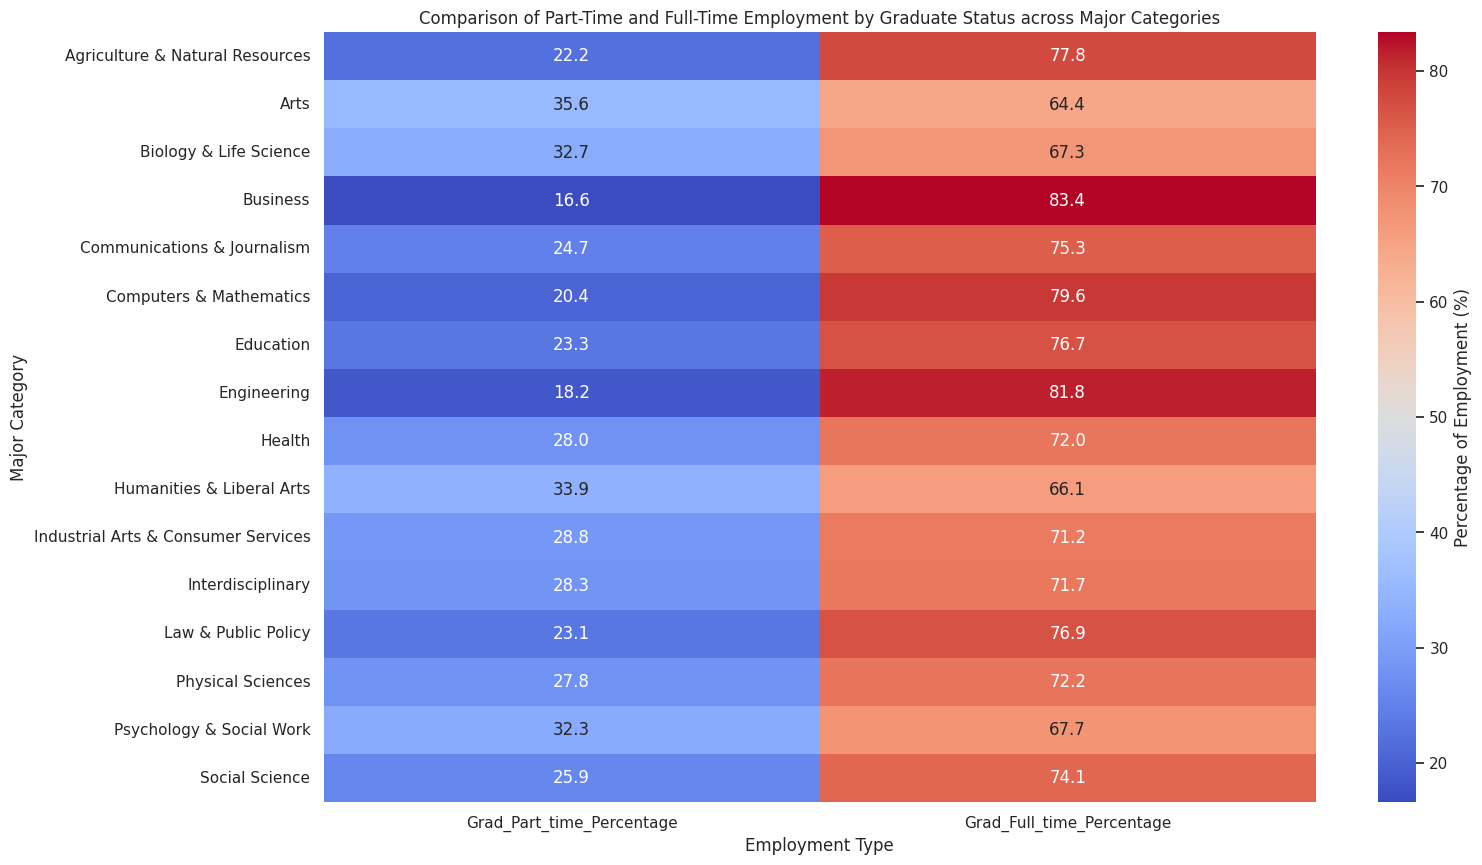

In [22]:
"""
Creating a heatmap to compare graduate employment status—part-time vs. full-time—
as percentages across different major categories.
"""

visualization_data = aggregated_data.set_index('Major_category')[['Grad_Part_time_Percentage', 'Grad_Full_time_Percentage']]

plt.figure(figsize=(16, 10))

sns.heatmap(visualization_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Percentage of Employment (%)'})
plt.title('Comparison of Part-Time and Full-Time Employment by Graduate Status across Major Categories')
plt.ylabel('Major Category')
plt.xlabel('Employment Type')

plt.show()

## **Findings/Analysis:**

**Note:** The heatmap visual does not provide the working environment for each major category that the recent graduates that are there working in.

<br>

***(worksite for graduates: unknown)***

<br>

Both employment statuses are summed up to 100 percent among full-time and part-time.

Based on the heatmap visual with the imports of seaborn the employment rate for full-time working status within the major category studies, the top three include - Business major coming in first (with an 83.4% rate), Engineering comes in second (with an 81.8% rate), and lastly, Computer and Mathematics coming in third (with a 79.6% rate) and so on.

<br>

As for the part-time working employment status, the top three for the part-time working major category after graduating include - Art coming in first place (with a 35.6% rate), Humanities and Liberal Arts coming in second (with a 33.9% rate), and Biology & Life Science comes in third (with an 32.7% rate) and so on.

<br>

Overall, The top three study major as mentioned for both part-time and full-time, seems to have a greater employment percentage rate.

<br>

But to also note, the worksites for these particular top three major studies for both part-time and full-time status are unknown but just as the data shows these study major categories have a higher percentage of employment.

## **Concluding:**

In conclusion, the heatmap visualization offers a representation of the percentage distribution across various major categories within graduate studies, as well as the employment status breakdown (such as part-time or full-time). Merging the two CSV files did not provide any insights into specific workplace locations, the heatmap still provides valuable insights into the overall outcomes for graduates based on their majors. The heatmap visual enables a understanding of the trends and patterns within graduates employment, despite the absence of specific workplace data. Though, I was able to determine the top three major categories for both part time and full time working status.


## Median wages by major category



merges two dataframes, calculates the median wages by major category, and then creates a bar plot showing the median wages for each major category. The plot includes legends for major categories and median wage range, with custom formatting and annotations. The colors in the plot are from the 'viridis' palette for better visualization.

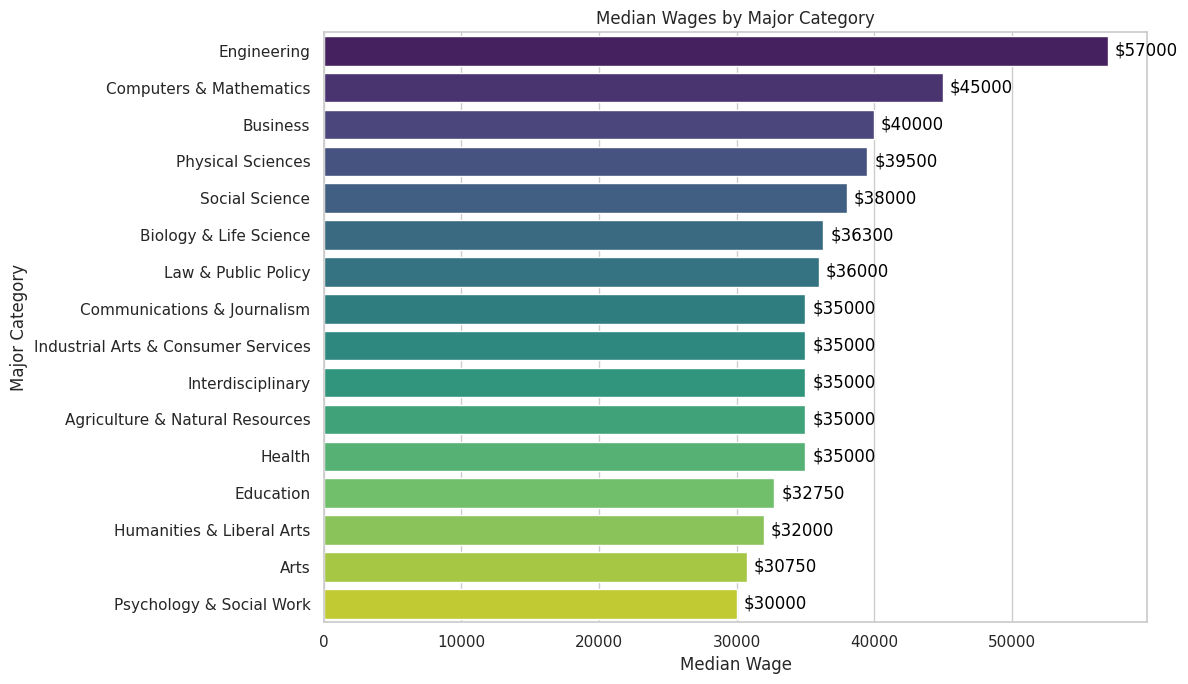

In [21]:
"""
Aggregating and selecting necessary columns to visualize median wages by major category
for recent graduates, based on their majors.
"""

merged_df = pd.merge(recent_gradsDF, major_listDF, on='Major')

median_wages = (
    merged_df.groupby('Major_Category')['Median']
    .median()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Median', y='Major_Category', data=median_wages,
                 hue='Major_Category', palette='viridis', dodge=False, legend=False)

for i, row in median_wages.iterrows():
    ax.text(row['Median'] + 500, i, f"${int(row['Median'])}", color='black', va='center')

plt.xlabel('Median Wage')
plt.ylabel('Major Category')
plt.title('Median Wages by Major Category')
plt.tight_layout()
plt.show()

## Observations :

Top Earning Major :

*   With a median salary of $57,000, engineering has the highest pay of any major. Engineers seem to be in high demand in the labor market because engineering is a highly skilled and technical sector.

*   The popularity of math and computer science is demonstrated by the $45,000 median income for these courses in this category.

*   Business: Majors in business enjoy the benefit of a relatively high median income of $40,000, as business skills are highly relevant and in demand across a wide range of industries.

Lowest Earning Majors:


*   Social work and psychology have the lowest median salaries, at $30,000. The nature of the employment, which frequently entails public service roles that might not be as highly compensated as technical or business roles, and the large number of graduates entering these professions could be the cause of this.

*   Arts: With a $30,750 median salary, arts majors also tend to make less money, which may be a result of the industry's competitiveness and revenue volatility.


Moderate Earning Majors : The median salary for those working in the physical sciences, social sciences, and biology and life sciences is 36,000 - 39,500 ($). They provide a midway ground, implying that although these disciplines pay well, they might not be as in-demand as computer science or engineering.

Implications for Students

*   When choosing a major based on prospective wages, students can utilize this data to guide their career planning. Engineers, computer scientists, and businesspeople may be of interest to those who are motivated by more pay.
Passion vs. Income: Students who are passionate about professions with lower median salaries, such social work or the arts, should balance their enthusiasm with the possible financial consequences. If they want to increase their earning potential, they can also check into further education or other career options.

*   Passion vs. Income: Students who are passionate about professions with lower median salaries, such social work or the arts, should balance their enthusiasm with the possible financial consequences. If they want to increase their earning potential, they can also check into further education or other career options.

Implications for Educators and Institutions

*   Curriculum Development: Institutions might invest more in programs with high earning potential to attract students. They might also look at ways to integrate more employable skills into lower-wage majors.

*   Career Services: Enhanced career counseling and services can help students in lower-wage fields find ways to maximize their employability and income, such as through internships, networking, or additional certifications.

Conclusion

The graph offers insightful information about how various academic specialties can affect one's ability to make money. Students should think about their interests and strengths in addition to their finances. The most fulfilling and long-lasting job decisions are probably those that take a balanced approach that takes passion and practical results into account.